Best Individual: [1, 1, 1, 0, 0]
Best Value: 32


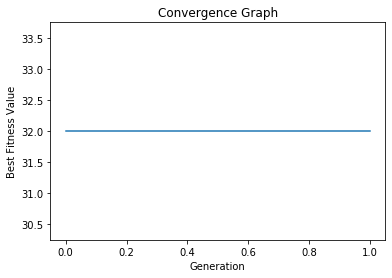

In [2]:
import random
import matplotlib.pyplot as plt

# Constants
knapsack_capacity = 10
num_items = 5
population_size = 50
max_generations = 300
mutation_rate = 0.15
crossover_rate = 0.7
items = [('A', 2, 10), ('B', 3, 7), ('C', 5, 15), ('D', 7, 10), ('E', 3, 3)]

# Function to calculate fitness of an individual
def fitness(individual):
    total_value = sum(item[2] for i, item in enumerate(items) if individual[i] == 1)
    total_weight = sum(item[1] for i, item in enumerate(items) if individual[i] == 1)
    if total_weight > knapsack_capacity:
        return 0
    else:
        return total_value

# Initialize population randomly
population = [random.choices([0, 1], k=num_items) for _ in range(population_size)]

# Lists to store best fitness values and generations
best_fitness_values = []
generations = []

# Main loop for genetic algorithm
for generation in range(max_generations):
    # Calculate fitness for each individual
    fitness_values = [fitness(individual) for individual in population]
    
    # Find the best individual in this generation
    best_index = fitness_values.index(max(fitness_values))
    best_individual = population[best_index]
    
    # Store best fitness and generation
    best_fitness_values.append(max(fitness_values))
    generations.append(generation)
    
    # Check termination criteria
    if generation > 0 and abs(best_fitness_values[-1] - best_fitness_values[-2]) < 0.001:
        break
    
    # Selection: Choose parents for crossover
    selected_indices = random.choices(range(population_size), k=int(crossover_rate * population_size))
    parents = [population[i] for i in selected_indices]
    
    # Crossover
    new_population = []
    for i in range(0, len(parents)-1, 2):
        if random.random() < 0.5:  # Use single-point crossover
            crossover_point = random.randint(1, num_items - 1)
            child1 = parents[i][:crossover_point] + parents[i+1][crossover_point:]
            child2 = parents[i+1][:crossover_point] + parents[i][crossover_point:]
        else:  # Use two-point crossover
            crossover_points = random.sample(range(1, num_items - 1), 2)
            crossover_points.sort()
            child1 = parents[i][:crossover_points[0]] + parents[i+1][crossover_points[0]:crossover_points[1]] + parents[i][crossover_points[1]:]
            child2 = parents[i+1][:crossover_points[0]] + parents[i][crossover_points[0]:crossover_points[1]] + parents[i+1][crossover_points[1]:]
        
        new_population.extend([child1, child2])
    
    # Mutation
    for i in range(population_size):
        if random.random() < mutation_rate:
            mutation_point = random.randint(0, num_items - 1)
            population[i][mutation_point] = 1 - population[i][mutation_point]  # Flip 0 to 1 or 1 to 0
    
    # Replace old population with new population
    population = new_population

# Print the best individual found
best_index = fitness_values.index(max(fitness_values))
best_individual = population[best_index]
print("Best Individual:", best_individual)
print("Best Value:", max(fitness_values))

# Plot the convergence graph
plt.plot(generations, best_fitness_values)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Value")
plt.title("Convergence Graph")
plt.show()